<a href="https://colab.research.google.com/github/Saraldedv/CCDATSCL_EXERCISE_COM222/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [86]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [87]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [89]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [90]:
cols = df.columns.tolist()
cols

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [91]:
shape_info = df.shape
shape_info

(8807, 12)

## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [92]:
missing_counts = df.isnull().sum()
missing_counts

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Drop rows where duration is missing. Save to df_clean.

In [93]:
df_clean = df.dropna(subset=['duration'])
df_clean.shape

(8804, 12)

4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [94]:
df_num = df_clean.select_dtypes(include='number')
df_num.head()

,release_year
0,2020
1,2021
2,2021
3,2021
4,2021


In [95]:
df_clean['duration_minutes'] = (
    df_clean['duration']
    .astype(str)
    .str.extract(r'(\d+)', expand=False)
    .astype(float)
)

dur = df_clean['duration_minutes']

/tmp/ipython-input-2880775726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_minutes'] = (


In [96]:
# All unique raw duration strings
duration_unique_raw = df_clean['duration'].unique()
print(duration_unique_raw)
len(duration_unique_raw)

['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '39 min'
 '46 m

220

## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [97]:
dur = df_clean['duration_minutes']
dur.head()

,duration_minutes
0,90.0
1,2.0
2,1.0
3,1.0
4,2.0


Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [98]:
# Apply Min–Max Scaling to dur. Store the result as dur_minmax.
dur_min = dur.min()
dur_max = dur.max()
dur_minmax = (dur - dur_min) / (dur_max - dur_min)
dur_minmax.head()

,duration_minutes
0,0.286174
1,0.003215
2,0.000000
3,0.000000
4,0.003215


Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [99]:
# Apply Z-score Standardization to dur. Store in dur_zscore.
dur_mean = dur.mean()
dur_std = dur.std()
dur_zscore = (dur - dur_mean) / dur_std
dur_zscore.head()

,duration_minutes
0,0.396599
1,-1.335179
2,-1.354858
3,-1.354858
4,-1.335179


## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
dur = df_clean['duration_minutes']

dur_width_bins = pd.cut(dur, bins=5)
df_clean['duration_equal_width_bin'] = dur_width_bins
dur_width_bins.head()

/tmp/ipython-input-1266558362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_equal_width_bin'] = dur_width_bins


,duration_minutes
0,"(63.2, 125.4]"
1,"(0.689, 63.2]"
2,"(0.689, 63.2]"
3,"(0.689, 63.2]"
4,"(0.689, 63.2]"


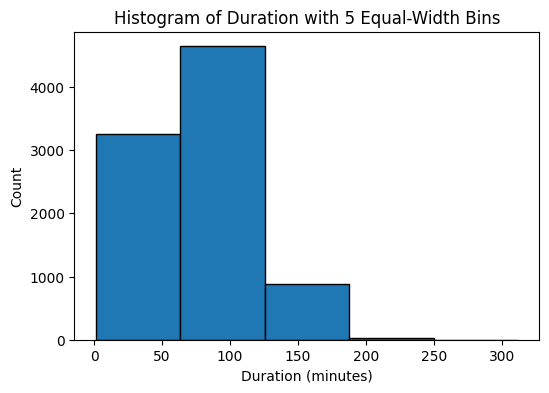

In [102]:
plt.figure(figsize=(6, 4))
plt.hist(dur, bins=5, edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Histogram of Duration with 5 Equal-Width Bins')
plt.show()

Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

In [103]:
bin_edges = dur_width_bins.cat.categories
bin_counts = dur_width_bins.value_counts().sort_index()

bin_edges, bin_counts

(IntervalIndex([(0.689, 63.2], (63.2, 125.4], (125.4, 187.6], (187.6, 249.8],
                (249.8, 312.0]],
               dtype='interval[float64, right]'),
 duration_minutes
 (0.689, 63.2]     3250
 (63.2, 125.4]     4643
 (125.4, 187.6]     880
 (187.6, 249.8]      28
 (249.8, 312.0]       3
 Name: count, dtype: int64)

Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

In [104]:
dur_quantile_bins = pd.qcut(dur, q=5, duplicates='drop')
df_clean['duration_equal_freq_bin'] = dur_quantile_bins
dur_quantile_bins.head()

/tmp/ipython-input-886751857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_equal_freq_bin'] = dur_quantile_bins


,duration_minutes
0,"(74.0, 95.0]"
1,"(0.999, 74.0]"
2,"(0.999, 74.0]"
3,"(0.999, 74.0]"
4,"(0.999, 74.0]"


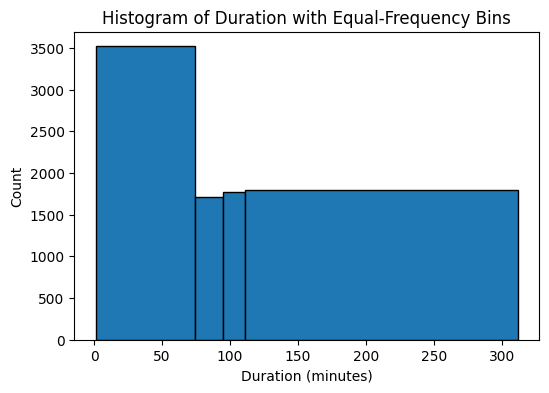

In [105]:
q_edges = dur_quantile_bins.cat.categories
freq_bin_edges = [q_edges[0].left] + [interval.right for interval in q_edges]

plt.figure(figsize=(6, 4))
plt.hist(dur, bins=freq_bin_edges, edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Histogram of Duration with Equal-Frequency Bins')
plt.show()

Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

In [106]:
q_bin_edges = dur_quantile_bins.cat.categories
q_bin_counts = dur_quantile_bins.value_counts().sort_index()

q_bin_edges, q_bin_counts

(IntervalIndex([(0.999, 74.0], (74.0, 95.0], (95.0, 111.0], (111.0, 312.0]], dtype='interval[float64, right]'),
 duration_minutes
 (0.999, 74.0]     3550
 (74.0, 95.0]      1818
 (95.0, 111.0]     1709
 (111.0, 312.0]    1727
 Name: count, dtype: int64)

In [107]:
# 1) Bin edges and total counts per bin
bin_edges = dur_width_bins.cat.categories
bin_counts = dur_width_bins.value_counts().sort_index()

print("Equal-width bin edges:")
print(bin_edges)
print("\nTotal titles in each bin:")
print(bin_counts)

# 2) Counts per bin by type (Movie / TV Show)
bin_type_counts = df_clean.groupby(['duration_equal_width_bin', 'type']).size()

print("\nTitles in each bin by type (Movie / TV Show):")
print(bin_type_counts)

/tmp/ipython-input-1839230639.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_type_counts = df_clean.groupby(['duration_equal_width_bin', 'type']).size()


Equal-width bin edges:
IntervalIndex([(0.689, 63.2], (63.2, 125.4], (125.4, 187.6], (187.6, 249.8],
               (249.8, 312.0]],
              dtype='interval[float64, right]')

Total titles in each bin:
duration_minutes
(0.689, 63.2]     3250
(63.2, 125.4]     4643
(125.4, 187.6]     880
(187.6, 249.8]      28
(249.8, 312.0]       3
Name: count, dtype: int64

Titles in each bin by type (Movie / TV Show):
duration_equal_width_bin  type   
(0.689, 63.2]             Movie       574
                          TV Show    2676
(63.2, 125.4]             Movie      4643
                          TV Show       0
(125.4, 187.6]            Movie       880
                          TV Show       0
(187.6, 249.8]            Movie        28
                          TV Show       0
(249.8, 312.0]            Movie         3
                          TV Show       0
dtype: int64


## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [109]:

# choose two numeric features
X = df_clean[['release_year', 'duration_minutes']].dropna()

# target: type (Movie vs TV Show)
y = df_clean.loc[X.index, 'type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X.head(), y.head()

(   release_year  duration_minutes
 0          2020              90.0
 1          2021               2.0
 2          2021               1.0
 3          2021               1.0
 4          2021               2.0,
 0      Movie
 1    TV Show
 2    TV Show
 3    TV Show
 4    TV Show
 Name: type, dtype: object)

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [119]:
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)


acc_raw4 = round(acc_raw, 4)
acc_raw4


0.9983

Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

acc_scaled4 = round(acc_scaled, 4)
acc_scaled4

0.9972

Did scaling improve accuracy? Explain why.

In [121]:
print("Accuracy without scaling:", acc_raw4)
print("Accuracy with scaling   :", acc_scaled4)

explanation = (
    "KNN uses distances between points, so features on larger scales "
    "dominate the distance calculation. Scaling makes features comparable "
    "and often improves performance."
)
explanation

Accuracy without scaling: 0.9983
Accuracy with scaling   : 0.9972


'KNN uses distances between points, so features on larger scales dominate the distance calculation. Scaling makes features comparable and often improves performance.'